In [6]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
#lat_lngs = zip(lats, lngs)
lat_lngs = [pair for pair in zip(lats, lngs)]
lat_lngs

[(1.0720585583812579, -65.27604787273896),
 (20.92694475793796, 108.70550995158965),
 (19.193552335553235, -72.0549411575163),
 (-35.45759483925768, -130.19513205973647),
 (-22.335590234307944, -53.61544251666807),
 (-39.219620051743846, -160.10237988298738),
 (-56.90974770796882, -111.45753029192785),
 (71.25688806204232, 138.41064319494728),
 (-74.06891863555627, -14.568342509127348),
 (8.865464059808389, 169.88341188890138),
 (-83.12194367974739, -31.902194094940683),
 (-68.52634131393872, 124.77214476786821),
 (63.27901429513429, 72.87500002322452),
 (-47.51826479689734, 76.23816566641841),
 (59.74157283744094, -103.36492335224987),
 (72.18815516460549, -30.189320396855692),
 (54.796537591035104, -119.38587319049068),
 (-77.00685333553668, -138.28280119032496),
 (-34.84937909358419, 160.44489053603513),
 (42.68669173893761, -124.34486252663349),
 (3.8297962348775343, -130.90236047133723),
 (-36.78441122946829, -164.16654761245996),
 (64.5689888931114, 163.00555995558676),
 (-54.580

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(1.0720585583812579, -65.27604787273896),
 (20.92694475793796, 108.70550995158965),
 (19.193552335553235, -72.0549411575163),
 (-35.45759483925768, -130.19513205973647),
 (-22.335590234307944, -53.61544251666807),
 (-39.219620051743846, -160.10237988298738),
 (-56.90974770796882, -111.45753029192785),
 (71.25688806204232, 138.41064319494728),
 (-74.06891863555627, -14.568342509127348),
 (8.865464059808389, 169.88341188890138),
 (-83.12194367974739, -31.902194094940683),
 (-68.52634131393872, 124.77214476786821),
 (63.27901429513429, 72.87500002322452),
 (-47.51826479689734, 76.23816566641841),
 (59.74157283744094, -103.36492335224987),
 (72.18815516460549, -30.189320396855692),
 (54.796537591035104, -119.38587319049068),
 (-77.00685333553668, -138.28280119032496),
 (-34.84937909358419, 160.44489053603513),
 (42.68669173893761, -124.34486252663349),
 (3.8297962348775343, -130.90236047133723),
 (-36.78441122946829, -164.16654761245996),
 (64.5689888931114, 163.00555995558676),
 (-54.580

In [9]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

629

In [11]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [12]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | santa isabel do rio negro
Processing Record 2 of Set 1 | beihai
Processing Record 3 of Set 1 | hinche
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | bataipora
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | castro
Processing Record 8 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 9 of Set 1 | cape town
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | muravlenko
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | la ronge
Processing Record 16 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 17 of Set 1 | beaverlodge
Processing Record 18 of Set 1 | port macquarie
Processing Record 19 of Set 1 | coos bay
Processing Record 20 of Set 1 | atuona
Processing Record 21 of Set 1 | kamens

Processing Record 34 of Set 4 | chokurdakh
Processing Record 35 of Set 4 | akonolinga
Processing Record 36 of Set 4 | tavda
Processing Record 37 of Set 4 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 4 | myitkyina
Processing Record 39 of Set 4 | bonavista
Processing Record 40 of Set 4 | rimbey
Processing Record 41 of Set 4 | necochea
Processing Record 42 of Set 4 | bilibino
Processing Record 43 of Set 4 | hiriyur
Processing Record 44 of Set 4 | fomboni
Processing Record 45 of Set 4 | kahului
Processing Record 46 of Set 4 | nouadhibou
Processing Record 47 of Set 4 | manggar
Processing Record 48 of Set 4 | artvin
Processing Record 49 of Set 4 | piacabucu
Processing Record 50 of Set 4 | udachnyy
Processing Record 1 of Set 5 | nueva loja
Processing Record 2 of Set 5 | lakshmipur
Processing Record 3 of Set 5 | mrirt
City not found. Skipping...
Processing Record 4 of Set 5 | siteki
Processing Record 5 of Set 5 | trairi
Processing Record 6 of Set 5 | kupang
Processing

Processing Record 28 of Set 8 | sorland
Processing Record 29 of Set 8 | rewari
Processing Record 30 of Set 8 | kemijarvi
Processing Record 31 of Set 8 | coahuayana
Processing Record 32 of Set 8 | gangotri
City not found. Skipping...
Processing Record 33 of Set 8 | bagdarin
Processing Record 34 of Set 8 | roald
Processing Record 35 of Set 8 | dicabisagan
Processing Record 36 of Set 8 | qaqortoq
Processing Record 37 of Set 8 | general pico
Processing Record 38 of Set 8 | dakar
Processing Record 39 of Set 8 | hope
Processing Record 40 of Set 8 | kutum
Processing Record 41 of Set 8 | faanui
Processing Record 42 of Set 8 | coihaique
Processing Record 43 of Set 8 | jumla
Processing Record 44 of Set 8 | mehamn
Processing Record 45 of Set 8 | grand river south east
City not found. Skipping...
Processing Record 46 of Set 8 | holetown
Processing Record 47 of Set 8 | hit
Processing Record 48 of Set 8 | alugan
Processing Record 49 of Set 8 | bouna
Processing Record 50 of Set 8 | lagoa
Processing R

Processing Record 16 of Set 12 | aflu
City not found. Skipping...
Processing Record 17 of Set 12 | gweta
Processing Record 18 of Set 12 | maues
Processing Record 19 of Set 12 | kazalinsk
City not found. Skipping...
Processing Record 20 of Set 12 | fairbanks
Processing Record 21 of Set 12 | maniitsoq
Processing Record 22 of Set 12 | hisor
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | berlevag
Processing Record 25 of Set 12 | oistins
Processing Record 26 of Set 12 | davila
Processing Record 27 of Set 12 | taburi
City not found. Skipping...
Processing Record 28 of Set 12 | sandakan
Processing Record 29 of Set 12 | conceicao do araguaia
Processing Record 30 of Set 12 | kikwit
Processing Record 31 of Set 12 | hovd
Processing Record 32 of Set 12 | poum
Processing Record 33 of Set 12 | taungdwingyi
Processing Record 34 of Set 12 | aojiang
Processing Record 35 of Set 12 | hastings
Processing Record 36 of Set 12 | louisbourg
City not found. Skipping...
Processing Re

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Santa Isabel Do Rio Negro,-0.4139,-65.0192,73.83,97,95,2.26,BR,2022-03-19 03:29:50
1,Beihai,21.4833,109.1000,75.04,82,18,8.99,CN,2022-03-19 03:29:51
2,Hinche,19.1500,-72.0167,76.39,69,66,1.77,HT,2022-03-19 03:29:52
3,Rikitea,-23.1203,-134.9692,80.51,72,40,8.14,PF,2022-03-19 03:29:52
4,Bataipora,-22.2953,-53.2711,71.62,97,100,0.74,BR,2022-03-19 03:29:53
5,Avarua,-21.2078,-159.7750,84.25,70,80,6.91,CK,2022-03-19 03:29:54
6,Castro,-24.7911,-50.0119,65.68,93,92,3.20,BR,2022-03-19 03:29:55
7,Cape Town,-33.9258,18.4232,66.11,82,0,11.50,ZA,2022-03-19 03:25:04
8,Butaritari,3.0707,172.7902,81.10,80,20,20.60,KI,2022-03-19 03:29:57
9,Ushuaia,-54.8000,-68.3000,35.26,87,20,9.22,AR,2022-03-19 03:27:10


In [17]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [18]:
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Santa Isabel Do Rio Negro,BR,2022-03-19 03:29:50,-0.4139,-65.0192,73.83,97,95,2.26
1,Beihai,CN,2022-03-19 03:29:51,21.4833,109.1000,75.04,82,18,8.99
2,Hinche,HT,2022-03-19 03:29:52,19.1500,-72.0167,76.39,69,66,1.77
3,Rikitea,PF,2022-03-19 03:29:52,-23.1203,-134.9692,80.51,72,40,8.14
4,Bataipora,BR,2022-03-19 03:29:53,-22.2953,-53.2711,71.62,97,100,0.74
...,...,...,...,...,...,...,...,...,...
572,Labrea,BR,2022-03-19 03:37:51,-7.2586,-64.7981,73.38,99,91,0.92
573,Nyahururu,KE,2022-03-19 03:37:52,0.0421,36.3673,55.36,76,93,4.38
574,Billings,US,2022-03-19 03:34:28,45.7833,-108.5007,47.97,41,40,4.61
575,Micheweni,TZ,2022-03-19 03:37:55,-4.9667,39.8333,79.25,80,31,4.16


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

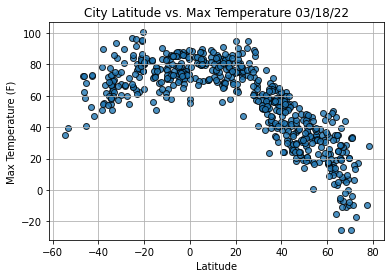

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

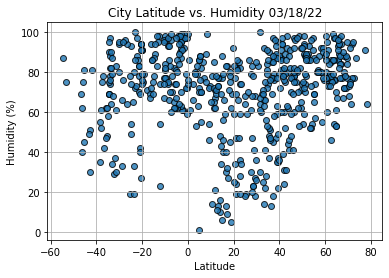

In [23]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

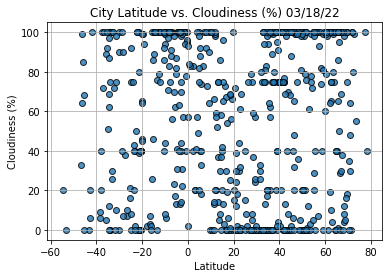

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

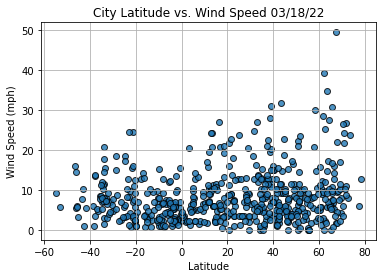

In [25]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [29]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [30]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [31]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

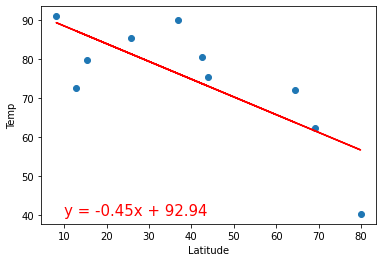

In [32]:
# Import Matplotlib.
import matplotlib.pyplot as plt
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [34]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [35]:
index13 = city_data_df.loc[13]
index13

City                     La Ronge
Country                        CA
Date          2022-03-19 03:30:00
Lat                       55.1001
Lng                     -105.2842
Max Temp                    34.05
Humidity                       69
Cloudiness                     20
Wind Speed                    0.0
Name: 13, dtype: object

In [36]:
city_data_df["Lat"] >= 0

0      False
1       True
2       True
3      False
4      False
       ...  
572    False
573     True
574     True
575    False
576    False
Name: Lat, Length: 577, dtype: bool

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Beihai,CN,2022-03-19 03:29:51,21.4833,109.1000,75.04,82,18,8.99
2,Hinche,HT,2022-03-19 03:29:52,19.1500,-72.0167,76.39,69,66,1.77
8,Butaritari,KI,2022-03-19 03:29:57,3.0707,172.7902,81.10,80,20,20.60
11,Muravlenko,RU,2022-03-19 03:29:59,63.7898,74.5230,18.93,97,100,17.29
13,La Ronge,CA,2022-03-19 03:30:00,55.1001,-105.2842,34.05,69,20,0.00


In [38]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

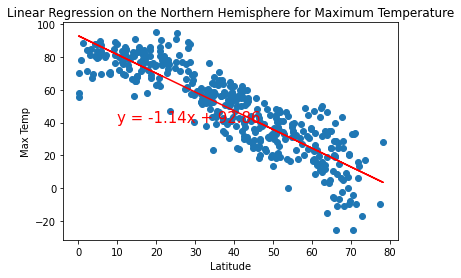

In [39]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

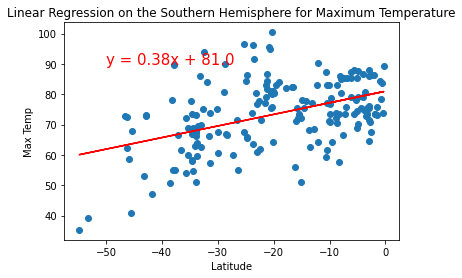

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

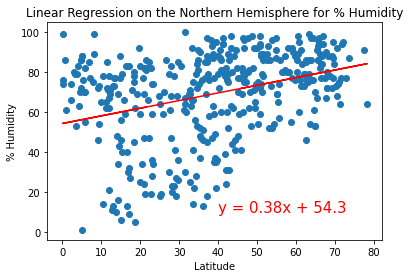

In [41]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))


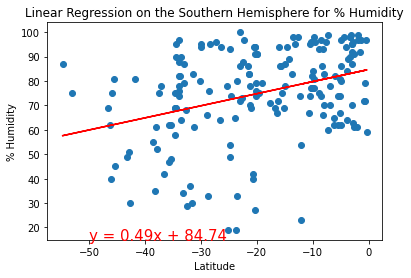

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))


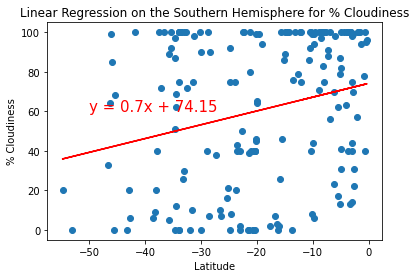

In [43]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

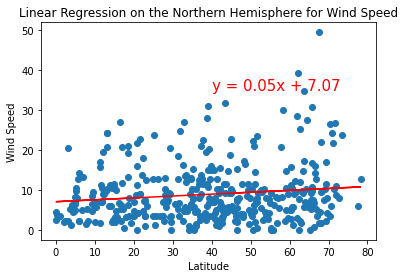

In [44]:
# Linear regression on the Northern Hemisphere
# comment
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

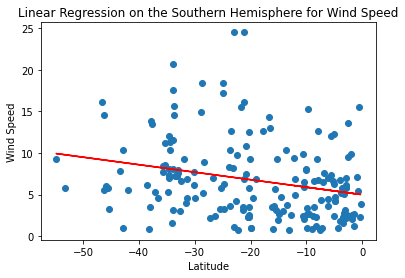

In [45]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))